In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [4]:
fLexFilms4="/Users/gilles/Downloads/Lexique4_min+filtr+cat+separ+corr3.tsv"

In [5]:
dfLexFilms4=pd.read_csv(filepath_or_buffer=fLexFilms4,sep="\t",header=None,skip_blank_lines=True,encoding="utf8")
dfLexFilms4.columns="graphie lemme cat infover genre nombre occurrences".split(" ")

In [6]:
dfLex4=dfLexFilms4.sort_values(["lemme","cat"]).reset_index().drop(columns="index")

In [7]:
dfLex4["rangFW"]=dfLex4["occurrences"].rank(ascending=False)
dfLex4=dfLex4[dfLex4["cat"].notnull()].sort_values("rangFW").reset_index().drop(columns="index")
dfLex4.head()

,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW
0,de,de,PRE,NaN,NaN,NaN,8309303.0,1.0
1,je,je,PRO:per,NaN,NaN,s,8027518.0,2.0
2,est,être,VER,ind:pre:3,NaN,s,6080693.0,3.0
3,pas,pas,ADV,NaN,NaN,NaN,5701766.0,4.0
4,la,la,ART:def,NaN,f,s,4396181.0,5.0


# Comparaison de la distribution des fréquences avec Zipf

In [8]:
#
# Adapted from
# https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7/43838500
#
def plotZipf(lDF,rankColumn,graphLabel=u"Formes dans Films",lQuartiles=["All"]):
    fig=plt.figure()
    ax = fig.add_subplot(111)

    lRang=lDF[rankColumn]
    lOccurrences=lDF["occurrences"]

    logOccurrences=np.log(lOccurrences)
    logRang=np.log(lRang)
    lQuart=len(logRang)/4

    mAll, cAll = np.polyfit(logRang, logOccurrences, 1)
    yZipfGen = np.exp(mAll*logRang + cAll)
    mQ1, cQ1 = np.polyfit(logRang[:lQuart], logOccurrences[:lQuart], 1)
    yZipfQ1 = np.exp(mQ1*logRang + cQ1)
    mQ2, cQ2 = np.polyfit(logRang[lQuart:2*lQuart], logOccurrences[lQuart:2*lQuart], 1)
    yZipfQ2 = np.exp(mQ2*logRang + cQ2)
    mQ3, cQ3 = np.polyfit(logRang[2*lQuart:3*lQuart], logOccurrences[2*lQuart:3*lQuart], 1)
    yZipfQ3 = np.exp(mQ3*logRang + cQ3)
    mQ4, cQ4 = np.polyfit(logRang[3*lQuart:], logOccurrences[3*lQuart:], 1)
    yZipfQ4 = np.exp(mQ4*logRang + cQ4)
    
    print u"Coefficient général %0.2f\n\tQ1 %0.2f\n\tQ2 %0.2f\n\tQ3 %0.2f\n\tQ4 %0.2f"%(mAll, mQ1, mQ2, mQ3, mQ4)

    plt.plot(lRang, lOccurrences,label='_nolegend_')
    if "All" in lQuartiles:
        plt.plot(lRang, yZipfGen,":",label="All")
    if "Q1" in lQuartiles:
        plt.plot(lRang, yZipfQ1, ':',label="Q1")
    if "Q2" in lQuartiles:
        plt.plot(lRang, yZipfQ2, ':',label="Q2")
    if "Q3" in lQuartiles:
        plt.plot(lRang, yZipfQ3, ':',label="Q3")
    if "Q4" in lQuartiles:
        plt.plot(lRang, yZipfQ4, ':',label="Q4")

    ax.set_yscale('log')
    ax.set_xscale('log')
    #slope, intercept = np.polyfit(logA, logB, 1)
    plt.xlabel("Rang")
    plt.ylabel("Occurrences")
    ax.set_title(graphLabel)
    ax.legend()
    plt.show()

## Comparaison de l'ensemble du lexique
le coefficient de Zipf varie du simple au double entre le premier quartile 1.56 et le dernier 3.70

Coefficient général -2.26
	Q1 -1.56
	Q2 -2.75
	Q3 -3.52
	Q4 -3.70


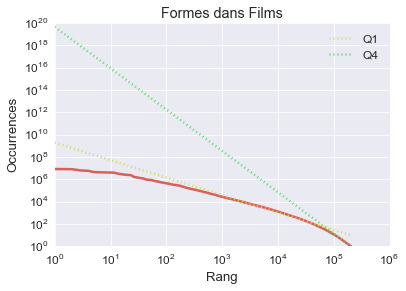

In [9]:
plotZipf(dfLex4,"rangFW",lQuartiles="Q1 Q4".split(" "))

## Comparaisons par catégories

In [10]:
dfL4={}

catV=["VER","AUX"]
dfVerbes4=dfLex4.loc[dfLex4["cat"].isin(catV),:]
dfVerbes4.loc[dfVerbes4["cat"].isin(catV),"rangFWV"]=dfVerbes4.loc[dfVerbes4["cat"].isin(catV),"occurrences"].rank(ascending=False)
dfL4["V"]=dfVerbes4.sort_values("rangFWV").reset_index().drop(columns="index")

dfNoms4=dfLex4.loc[dfLex4["cat"]=="NOM",:]
dfNoms4.loc[dfNoms4["cat"]=="NOM","rangFWN"]=dfNoms4.loc[dfNoms4["cat"]=="NOM","occurrences"].rank(ascending=False)
dfL4["N"]=dfNoms4.sort_values("rangFWN").reset_index().drop(columns="index")

dfAdjectifs4=dfLex4.loc[dfLex4["cat"]=="ADJ",:]
dfAdjectifs4.loc[dfAdjectifs4["cat"]=="ADJ","rangFWA"]=dfAdjectifs4.loc[dfAdjectifs4["cat"]=="ADJ","occurrences"].rank(ascending=False)
dfL4["A"]=dfAdjectifs4.sort_values("rangFWA").reset_index().drop(columns="index")

for cat in "VNA":
    print cat
    display(dfL4[cat].head())

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


V


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWV
0,est,être,VER,ind:pre:3,NaN,s,6080693.0,3.0,1.0
1,a,avoir,AUX,ind:pre:3,NaN,s,2139655.0,24.0,2.0
2,ai,avoir,AUX,ind:pre:1,NaN,s,1641324.0,26.0,3.0
3,a,avoir,VER,ind:pre:3,NaN,s,1528403.0,28.0,4.0
4,est,être,AUX,ind:pre:3,NaN,s,1030580.0,41.0,5.0


N


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWN
0,chose,chose,NOM,NaN,f,s,494041.0,87.0,1.0
1,temps,temps,NOM,NaN,m,NaN,354682.0,122.0,2.0
2,besoin,besoin,NOM,NaN,m,s,332955.0,131.0,3.0
3,accord,accord,NOM,NaN,m,s,307708.0,144.0,4.0
4,vie,vie,NOM,NaN,f,s,303952.0,145.0,5.0


A


,graphie,lemme,cat,infover,genre,nombre,occurrences,rangFW,rangFWA
0,juste,juste,ADJ,NaN,NaN,s,323706.0,139.0,1.0
1,bon,bon,ADJ,NaN,m,s,297776.0,153.0,2.0
2,tout,tout,ADJ,NaN,m,s,286396.0,160.0,3.0
3,tous,tout,ADJ,NaN,m,p,282537.0,162.0,4.0
4,sûr,sûr,ADJ,NaN,m,s,267518.0,171.0,5.0


On peut calculer le ratio entre le coefficient du premier quartile et celui du quatrième.
- pour les verbes, Q4/Q1=2.05
- pour les noms, Q4/Q1=3.03
- pour les adjectifs, Q4/Q1=3.48

V
Coefficient général -2.14
	Q1 -1.55
	Q2 -2.57
	Q3 -3.11
	Q4 -3.17


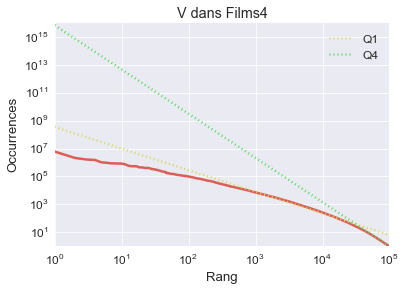

N
Coefficient général -2.36
	Q1 -1.41
	Q2 -3.08
	Q3 -3.97
	Q4 -4.27


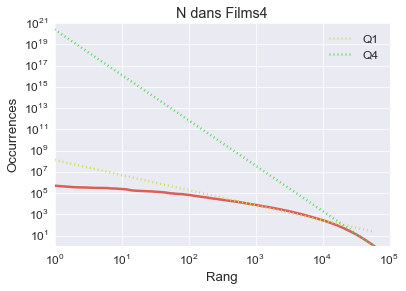

A
Coefficient général -2.04
	Q1 -1.28
	Q2 -2.47
	Q3 -3.61
	Q4 -4.45


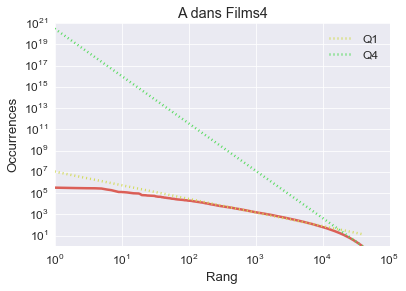

In [11]:
for cat in "VNA":
    print cat
    plotZipf(dfL4[cat],"rangFW%s"%cat,graphLabel="%s dans Films4"%cat,lQuartiles="Q1 Q4".split(" "))

# Statistiques sur les cases du paradigme morphosyntaxique

## Filtrer les scories de Lexique4
- quelques formes fléchies sont notées avec des lemmes qui ne correspondent pas à un verbe
- quelques formes ne sont pas identifiées : infover = NaN
- une forme est indiquée comme impératif 3S

Dans tous les cas, on remplace l'étiquette de Lexique.org par l'étiquette Grace

In [12]:
dfL4["V"].infover.unique()

array([u'ind:pre:3', u'ind:pre:1', u'inf;', u'ind:imp:3', u'ind:pre:2',
       u'par:pas:', u'imp:pre:2', u'inf', u'ind:imp:1', u'ind:fut:3',
       u'cnd:pre:3', u'sub:pre:3', u'imp:pre:1', u'cnd:pre:1', nan,
       u'cnd:pre:2', u'ind:imp:2', u'ind:fut:1', u'par:p', u'ind:fut:2',
       u'sub:pre:2', u'ind:pas:3', u'sub:pre:1', u'ind:pas:1',
       u'ind:pas:2', u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;', u'sub:imp:3', u'ind:pas:3s;',
       u'sub:imp:1', u'imp:pre:3', u'sub:imp:2'], dtype=object)

In [13]:
def infover2Case(lRow):
    result=""
    lInfover=lRow["infover"]
    lNombre=lRow["nombre"]
    if isinstance(lInfover,unicode):
        if lInfover in [u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;']:
            print lRow["graphie"],lRow["lemme"]
        else:
            if lInfover[:3]==u"inf":
                result=u"inf"
            elif lInfover==u"par:p":
                result="pP"
            elif lInfover[:8]==u"par:pas:":
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                else:
                    print lRow
                lGenre=lRow["genre"]
                if lGenre in ["m","f"]:
                    lGenre=lGenre.upper()
                else:
                    print lRow
                result="pp"+lGenre+lNombre
            else:
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                    if lInfover[:8]==u"ind:pre:":
                        result="pi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:imp:":
                        result="ii"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:fut:":
                        result="fi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:pas:":
                        result="ai"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"imp:pre:":
                        result="pI"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:pre:":
                        result="ps"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:imp:":
                        result="is"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"cnd:pre:":
                        result="pc"+lInfover[8]+lNombre
                else:
                    print lRow               
    return result

print "Problèmes de lemme"
dfL4["V"]["case"]=dfL4["V"].apply(infover2Case,axis=1)

Problèmes de lemme
faîtes faîte
monte monte
partons parton
monte monte
monte monte
excitons exciton
transposons transposon


### exporter les erreurs de Lexique4-Verbes pour correction
- lexèmes sans case
- lexèmes avec une forme d'impératif 3SG

In [14]:
dfL4ErrorsV=dfL4["V"][dfL4["V"]["case"].isin(["","pI3S"])]
dfL4ErrorsV.to_csv(path_or_buf="PB-Lex4-Verbes.csv",sep="\t",encoding="utf8")

### aggréger les comptes des formes artificiellement séparées par Lexique4
- groupby graphie, lemme, case
 - AUX et VER ensemble pour un même lemme
 - les infover inf et inf; sont regroupés via la case inf
- recalcul du rang après regroupements

In [15]:
dfL4["VFiltre"]=dfL4["V"][~dfL4["V"]["case"].isin(["","pI3S"])]
dfL4["VFiltre"]=dfL4["VFiltre"].groupby("graphie lemme case".split(" "))[["occurrences"]].sum().reset_index()
dfL4["VFiltre"]["rangFWV"]=dfL4["VFiltre"]["occurrences"].rank(ascending=False)
dfL4["VFiltre"].sort_values("rangFWV").head()

,graphie,lemme,case,occurrences,rangFWV
42094,est,être,pi3S,7111273.0,1.0
2,a,avoir,pi3S,3668058.0,2.0
3304,ai,avoir,pi1S,2407163.0,3.0
6631,as,avoir,pi2S,1021787.0,4.0
105195,était,être,ii3S,982148.0,5.0


La fréquence cumulée pour chaque case donne une idée de la présence de la case dans le corpus. Mais cette fréquence est largement influencée par les formes de lexèmes extrèmement fréquents. La troisième personne du singulier du présent indicatif se situe largement au dessus de toutes les autres formes avec 17M. L'étude de la médiane ou du premier quartile donne une image moins biaisée des rapports de distribution entre les cases.

In [16]:
dfCasesTokens=dfL4["VFiltre"][dfL4["VFiltre"]["case"]!=""].groupby("case")[["occurrences"]].sum().sort_values("occurrences",ascending=False)
dfCasesTokens.head()

,occurrences
case,
pi3S,17617887.0
inf,11917396.0
pi1S,9144293.0
ppMS,7704344.0
pi2S,4043374.0


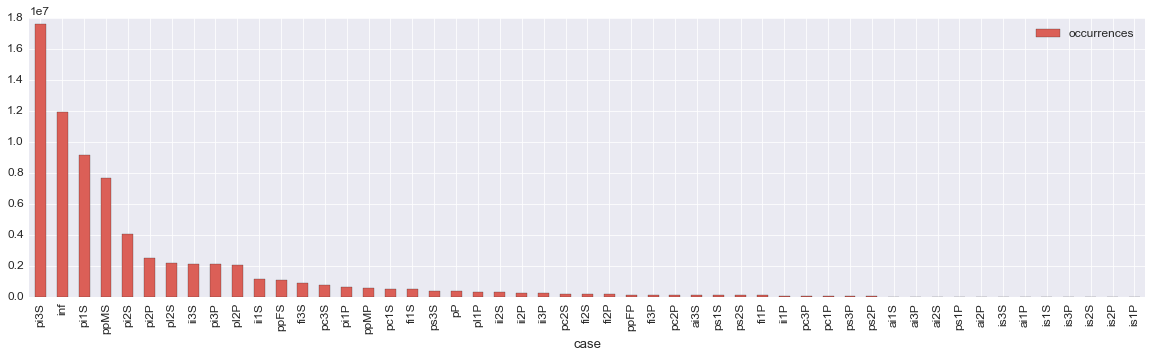

In [17]:
ax=dfCasesTokens.plot(kind="bar",figsize=(20,5))
#ax.set_yscale('log')


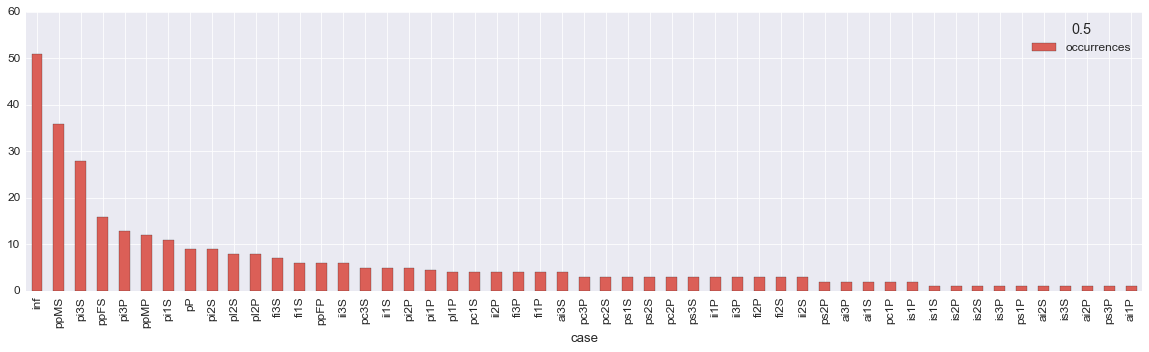

In [18]:
dfL4["VFiltre"][dfL4["VFiltre"]["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.5).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

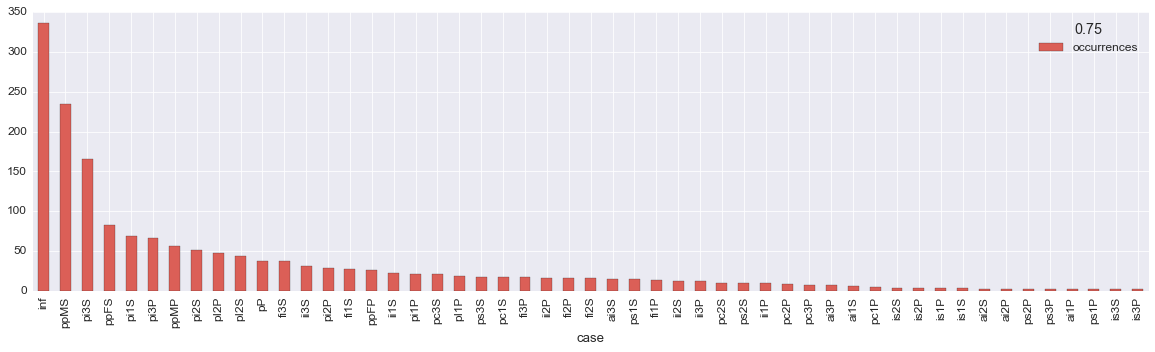

In [19]:
dfL4["VFiltre"][dfL4["VFiltre"]["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.75).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

In [20]:
dfL4["VFiltre"]["nb"]=1
dfL4["VFiltre"].head()

,graphie,lemme,case,occurrences,rangFWV,nb
0,-tu,taire,ppMS,8.0,49602.5,1
1,=,égaler,pi3S,4218.0,1487.0,1
2,a,avoir,pi3S,3668058.0,2.0,1
3,a,avoir,ppMS,1.0,94631.0,1
4,abaissa,abaisser,ai3S,5.0,58201.5,1


### Lexèmes avec surabondance
Pour les lexèmes sujets à surabondance, il est possible d'avoir plus de 51 formes listées mais une partie des lexèmes de la liste ne font pas partie des surabondants.

In [21]:
dfSurabondances=dfL4["VFiltre"].groupby(["lemme","case"]).agg({"graphie":lambda x: "-".join(x),"nb":"count"}).reset_index()
dfL4Surabondances=dfSurabondances[dfSurabondances["nb"]>1]
dfL4Surabondances.to_csv(path_or_buf="PB-Lex4-Surabondances.csv",sep="\t",encoding="utf8")

In [22]:
dfL4Surabondances

,lemme,case,nb,graphie
50,abandonner,ii3P,2,abandonnaient-abandonné
51,abandonner,ii3S,2,abandonnait-abandonné
54,abandonner,pI2P,2,abandonner-abandonnez
65,abandonner,pi2P,2,abandonner-abandonnez
115,abattre,pi2P,2,abattez-abattre
264,aborder,ii3P,2,abordaient-abordé
345,aboyer,pi2P,2,aboyer-aboyez
518,absorber,ii3P,2,absorbaient-absorbé
551,absoudre,pi2P,2,absolvez-absoudre
615,abuser,ii3P,2,abusaient-abusé


In [23]:
dfL4LexFormesV=dfL4["VFiltre"].groupby("lemme")[["occurrences","nb"]].count()
dfL4LexFormesV[dfL4LexFormesV["occurrences"]>51].index.tolist()

[u'aimer',
 u'aller',
 u'appeler',
 u'asseoir',
 u'avoir',
 u'devoir',
 u'donner',
 u'effrayer',
 u'envoyer',
 u'essayer',
 u'laisser',
 u'payer',
 u'penser',
 u'porter',
 u'pouvoir',
 u'savoir',
 u'trouver',
 u'vouloir',
 u'\xeatre']

### regroupement des formes de lexème pour une même case

In [24]:
dfL4LexCasesV=dfL4["VFiltre"].groupby(["lemme","case"]).sum().reset_index()

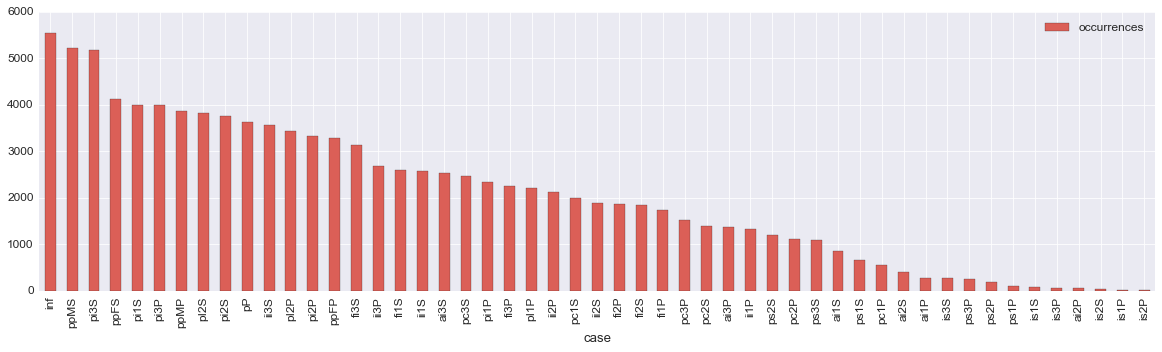

In [25]:
dfCasesTypes=dfL4LexCasesV[dfL4LexCasesV["case"]!=""].groupby("case")[["occurrences"]].count().sort_values("occurrences",ascending=False)
dfCasesTypes.plot(kind="bar",figsize=(20,5))

# Statistiques sur les lexèmes

### Nombre de lexèmes

In [26]:
nbLexemes=len(dfL4LexCasesV["lemme"].unique())
numMedian=nbLexemes/2
print u"Nombre de lexèmes : %d"%nbLexemes
print u"Numéro du lexème médian : %d"%numMedian

Nombre de lexèmes : 6548
Numéro du lexème médian : 3274


## Nombre de formes par lexème
- on compte le nombre de cases remplies par lexème
 - groupby("lemme").count()

In [27]:
dfNbCasesV=dfL4LexCasesV.groupby("lemme").count().sort_values("nb")

- on compte le nombre de lexèmes qui possède *nb* formes
 - occurrences et nb contiennent le nombre de formes de chaque lexème, le groupby("occurrences")[["nb"]].count() permet de compter combien de lexèmes possède chaque nombre de formes.

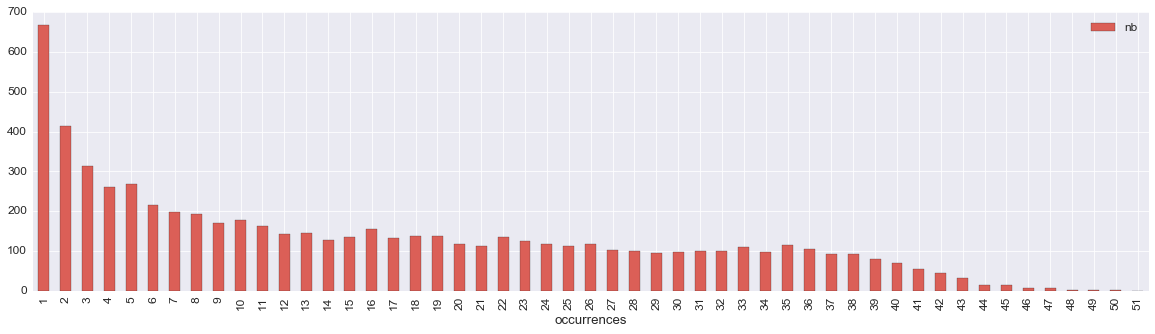

In [28]:
dfDistNbFormes=dfNbCasesV.groupby("occurrences")[["nb"]].count()
dfDistNbFormes.plot(kind="bar",figsize=(20,5))

In [29]:
(dfDistNbFormes.index*dfDistNbFormes["nb"]).sum(),dfDistNbFormes["nb"].sum()

(104019, 6548)

In [30]:
nbMoyenFormesLex=float((dfDistNbFormes.index*dfDistNbFormes["nb"]).sum())/dfDistNbFormes["nb"].sum()
print u"Nombre moyen de formes par lexème : %0.3g"%nbMoyenFormesLex
nbCumul=0
for ix,row in dfDistNbFormes.iterrows():
    nbCumul+=row["nb"]
    if nbCumul>=numMedian:
        nbMedianFormesLex=ix
        break
print u"Nombre médian de formes par lexème : %d"%nbMedianFormesLex

Nombre moyen de formes par lexème : 15.9
Nombre médian de formes par lexème : 13


Le nombre moyen de formes par lexème est légèrement supérieur à celui calculé par Bonami & Beniamine mais du même ordre de grandeur.

In [31]:
dfL4LexCasesV.head()

,lemme,case,occurrences,rangFWV,nb
0,abaisser,ai2P,1.0,94631.0,1
1,abaisser,ai3S,5.0,58201.5,1
2,abaisser,fi1P,3.0,68534.0,1
3,abaisser,fi1S,69.0,20166.0,1
4,abaisser,fi2P,3.0,68534.0,1


## Fréquence des lexèmes

In [32]:
dfL4LexV=dfL4LexCasesV.groupby("lemme")[["occurrences"]].sum()

In [33]:
dfL4LexV["rangFLV"]=dfL4LexV["occurrences"].rank(ascending=False)
dfL4LexV=dfL4LexV.sort_values("rangFLV").reset_index()

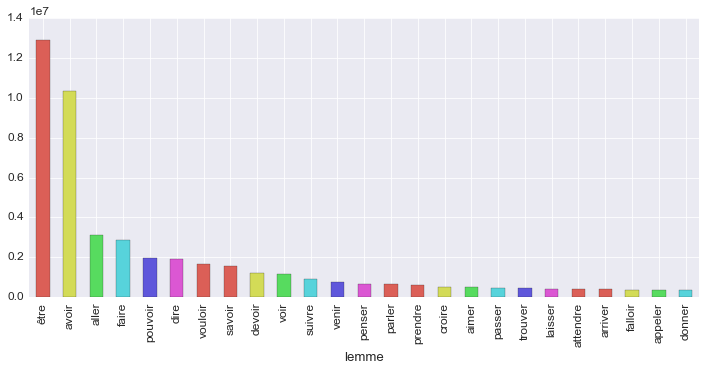

In [34]:
dfL4LexV.set_index("lemme")["occurrences"].head(25).plot(kind="bar",figsize=(12,5))

Coefficient général -2.70
	Q1 -1.49
	Q2 -2.74
	Q3 -5.52
	Q4 -10.28


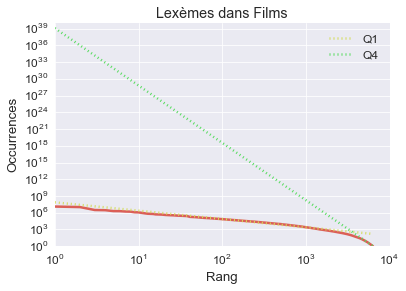

In [35]:
plotZipf(dfL4LexV,"rangFLV",lQuartiles="Q1 Q4".split(" "),graphLabel=u"Lexèmes dans Films")

$C_n^p$